In [ ]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [ ]:
from google.colab import files
upload = files.upload()

KeyboardInterrupt: 

In [ ]:
df = pd.read_csv(io.BytesIO(upload['calendar.csv']))

In [ ]:
df.shape

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4326814 entries, 0 to 4326813
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  float64
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 231.1+ MB


In [ ]:
df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,222887,2023-12-16,f,$160.00,NaN,3.0,1125.0
1,222887,2023-12-17,f,$160.00,NaN,3.0,1125.0
2,222887,2023-12-18,t,$160.00,NaN,3.0,1125.0
3,222887,2023-12-19,t,$160.00,NaN,3.0,1125.0
4,222887,2023-12-20,t,$160.00,NaN,3.0,1125.0


## Getting rid of the '$' sign and comas, as well as changing the 'price' column to a float number and 'date' column to datetime prior working with the dataset

In [ ]:
df['price'] = df['price'].str.strip().str.replace('$', '').str.replace(',', '').astype(float)

In [ ]:
# Convert 'date' column to datetime

df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.tail(10)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
4326804,1046327906669372136,2024-12-05,f,100.0,NaN,3.0,8.0
4326805,1046327906669372136,2024-12-06,f,100.0,NaN,2.0,8.0
4326806,1046327906669372136,2024-12-07,f,100.0,NaN,3.0,8.0
4326807,1046327906669372136,2024-12-08,f,100.0,NaN,3.0,8.0
4326808,1046327906669372136,2024-12-09,f,100.0,NaN,3.0,8.0
4326809,1046327906669372136,2024-12-10,f,100.0,NaN,3.0,8.0
4326810,1046327906669372136,2024-12-11,f,100.0,NaN,3.0,8.0
4326811,1046327906669372136,2024-12-12,f,100.0,NaN,3.0,8.0
4326812,1046327906669372136,2024-12-13,f,100.0,NaN,2.0,8.0
4326813,1046327906669372136,2024-12-14,f,100.0,NaN,3.0,8.0


In [ ]:
df.nunique(axis=0)

listing_id        11854
date                376
available             2
price               395
adjusted_price        0
minimum_nights       61
maximum_nights      378
dtype: int64

In [ ]:
df.describe()

,listing_id,price,adjusted_price,minimum_nights,maximum_nights
count,4.326814e+06,4.326814e+06,0.0,4.326813e+06,4.326813e+06
mean,3.182320e+17,1.146554e+02,NaN,4.321625e+01,3.619419e+05
std,4.102210e+17,2.159027e+02,NaN,1.123849e+02,2.785319e+07
min,2.228870e+05,9.000000e+00,NaN,1.000000e+00,1.000000e+00
25%,2.335972e+07,5.000000e+01,NaN,1.000000e+00,3.100000e+01
50%,4.568256e+07,7.900000e+01,NaN,2.000000e+00,3.650000e+02
75%,7.612822e+17,1.200000e+02,NaN,5.000000e+00,1.125000e+03
max,1.046328e+18,9.999000e+03,NaN,9.990000e+02,2.147484e+09


In [ ]:
df['adjusted_price']

In [ ]:
df.isnull().sum()

listing_id              0
date                    0
available               0
price                   0
adjusted_price    4326814
minimum_nights          1
maximum_nights          1
dtype: int64

In [ ]:
df = df.drop(['adjusted_price'], axis = 1)

In [ ]:
df.isnull().sum()

listing_id        0
date              0
available         0
price             0
minimum_nights    1
maximum_nights    1
dtype: int64

In [ ]:
df = df.dropna(inplace=True)

In [ ]:
cleaned_df = df.dropna(inplace=False)

In [ ]:
df.isnull().sum()

listing_id        0
date              0
available         0
price             0
minimum_nights    0
maximum_nights    0
dtype: int64

In [ ]:
df = pd.read_csv('calendar.csv')

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df)

number of duplicate rows:  Empty DataFrame
Columns: [listing_id, date, available, price, minimum_nights, maximum_nights]
Index: []


In [ ]:
df.count()

listing_id        4326813
date              4326813
available         4326813
price             4326813
minimum_nights    4326813
maximum_nights    4326813
dtype: int64

## There are no duplicate values, there are no NULL values and all the data is pretty clean. So now we can star the analysis...

### Detecting Outliers

<Axes: xlabel='price'>

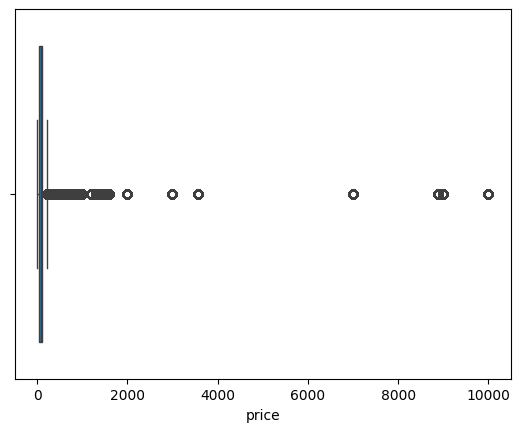

In [ ]:
sns.boxplot(x=df['price'])

<Axes: xlabel='minimum_nights'>

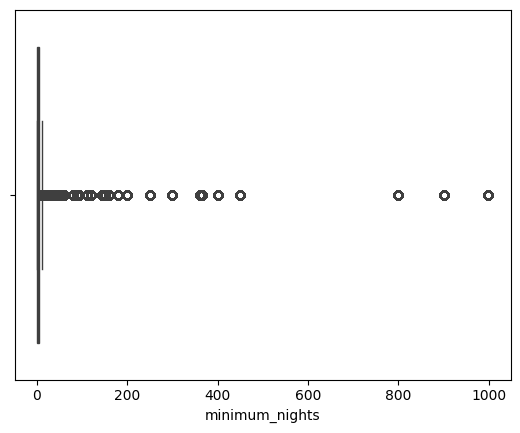

In [ ]:
sns.boxplot(x=df['minimum_nights'])

<Axes: xlabel='maximum_nights'>

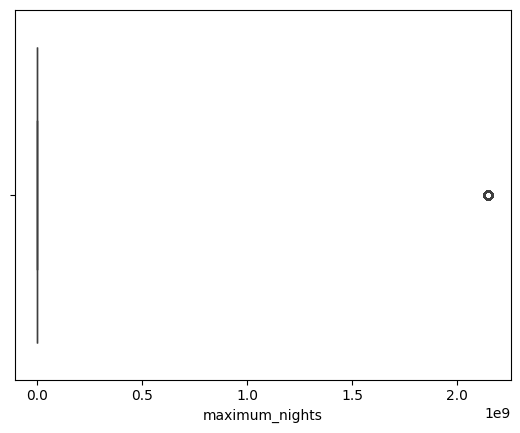

In [ ]:
sns.boxplot(x=df['maximum_nights'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4326813 entries, 0 to 4326813
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           float64
 4   minimum_nights  float64
 5   maximum_nights  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 231.1+ MB


## Histograms to visualize the distributions of numerical variables (price, min_nights, max_nights) to understand the range and frequency of values in these columns.

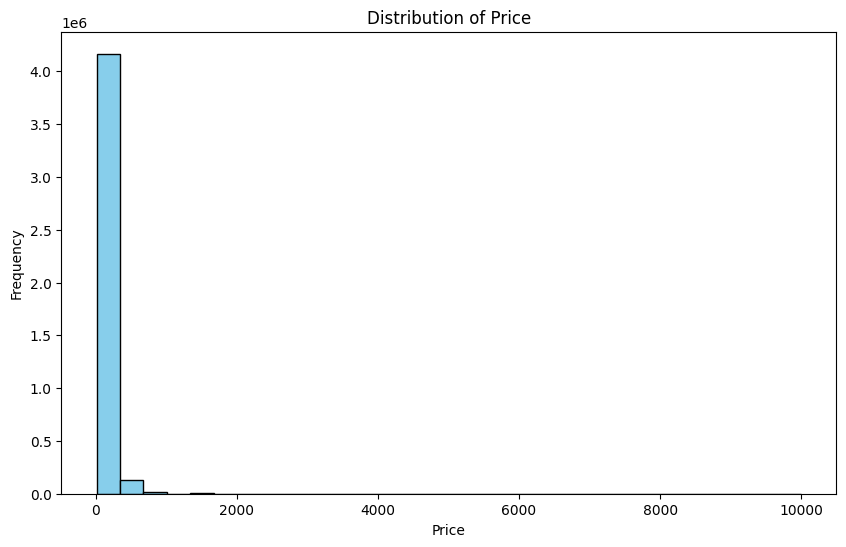

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

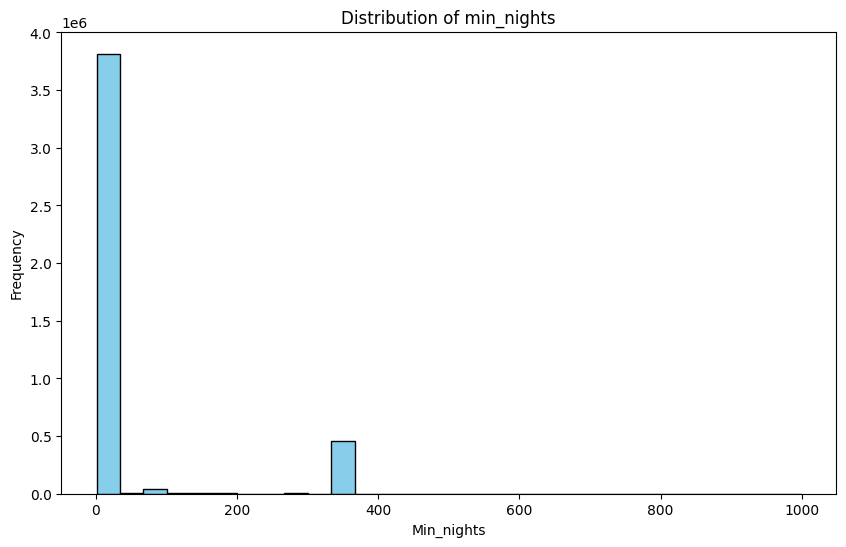

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['minimum_nights'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Min_nights')
plt.ylabel('Frequency')
plt.title('Distribution of min_nights')
plt.show()

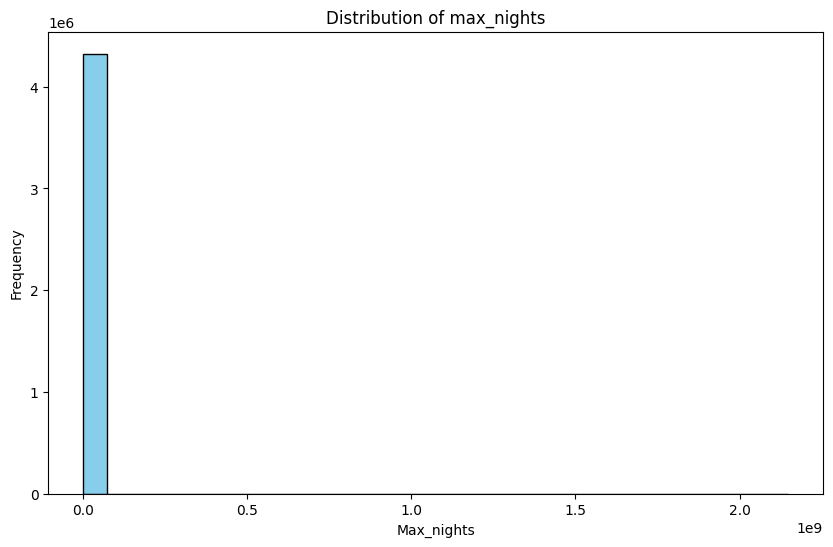

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['maximum_nights'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Max_nights')
plt.ylabel('Frequency')
plt.title('Distribution of max_nights')
plt.show()

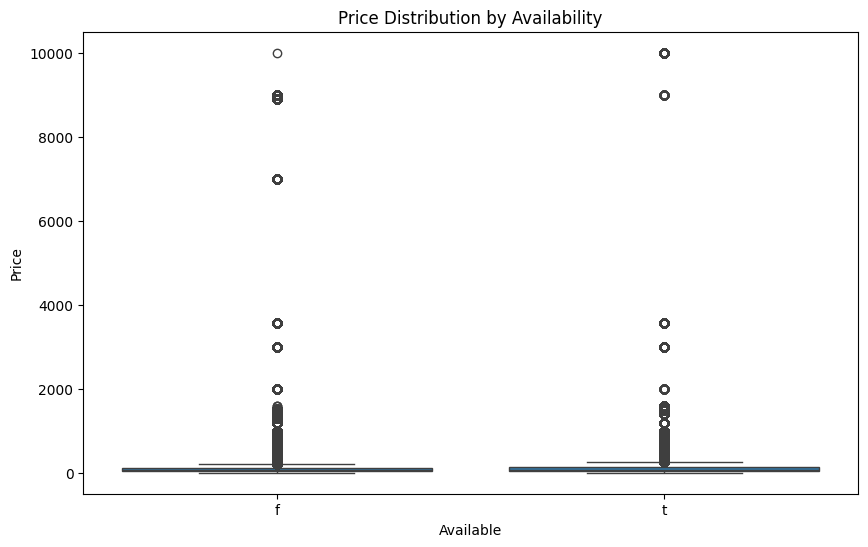

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='available', y='price', data=df)
plt.xlabel('Available')
plt.ylabel('Price')
plt.title('Price Distribution by Availability')
plt.show()

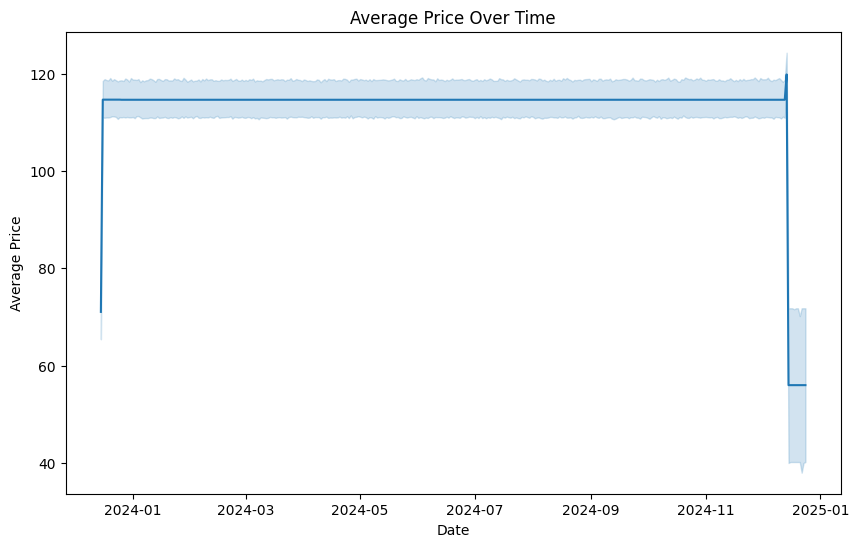

In [ ]:

plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='price', data=df)
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price Over Time')
plt.show()

# we can see that most of the time average price is around 118$

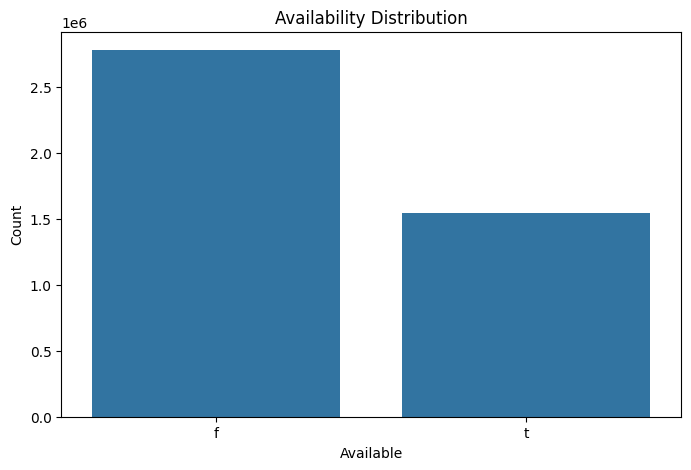

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='available', data=df)
plt.xlabel('Available')
plt.ylabel('Count')
plt.title('Availability Distribution')
plt.show()

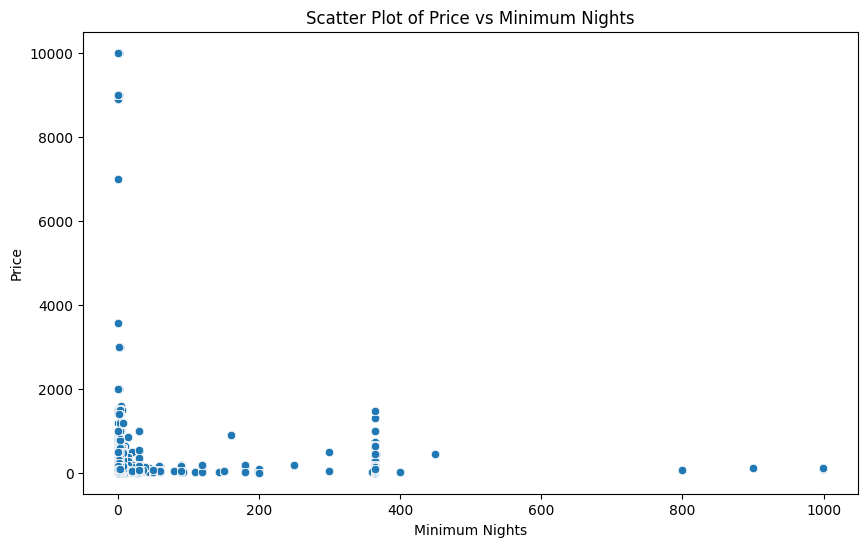

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='minimum_nights', y='price', data=df)
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Minimum Nights')
plt.show()

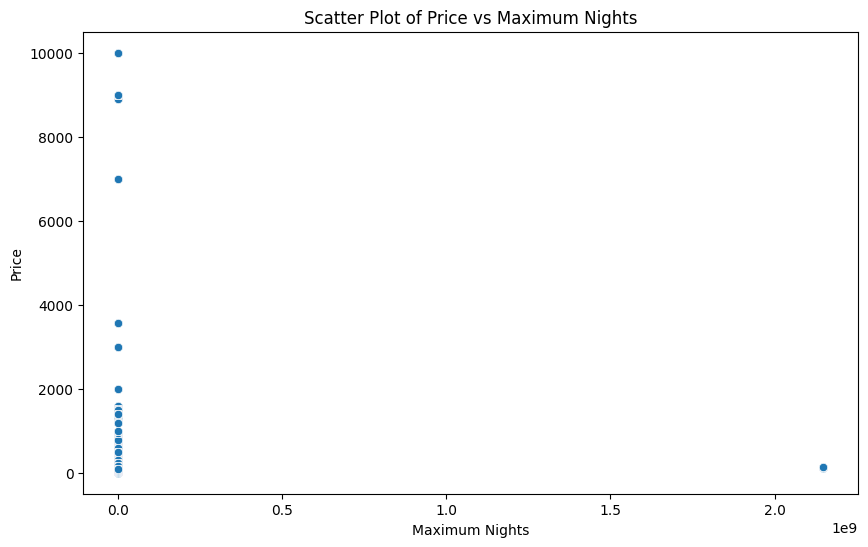

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='maximum_nights', y='price', data=df)
plt.xlabel('Maximum Nights')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Maximum Nights')
plt.show()

In [ ]:
df.corr()

NameError: name 'df' is not defined

In [ ]:
sns.heatmap(df.corr())